# Why Guns are the main problem in America

To explain the perspective that guns should be banned in America, we have substantiated 3 arguments with 3 visualizations to go with them. While it may not be possible to completely abolish the Second Amendment in the entirety of the United States, the government should nationally enforce heavy restrictions on the Second Amendment.

The first visualization as a line-dot chart supports our argument that having less restrictions and more freedom on rights to own and use a gun indeed leads to more gun violence in states where thus gun usage is more allowed. 

/tmp/ipykernel_19684/876258089.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



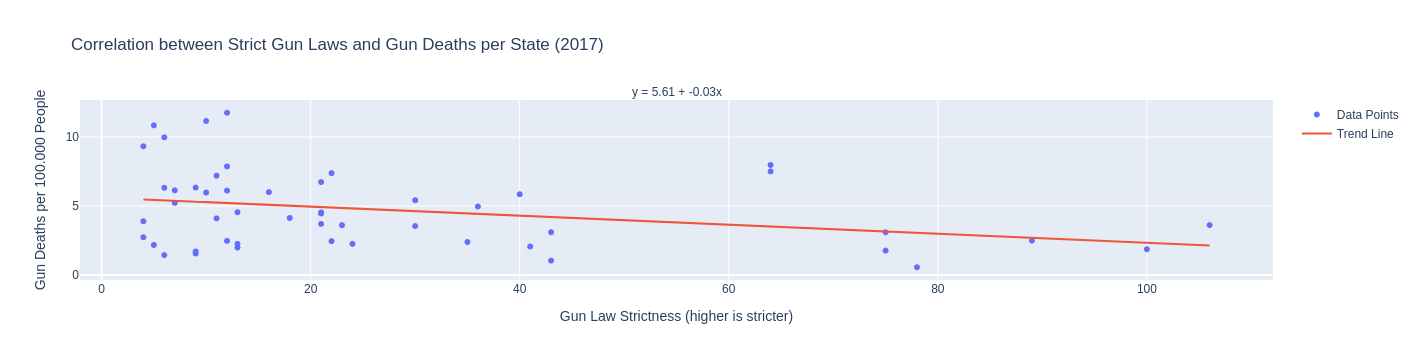

In [4]:
import pandas as pd
import plotly.graph_objects as go
import statsmodels.api as sm

# Load the datasets
df_guns = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df_laws = pd.read_csv('raw_data.csv')
df_statepop = pd.read_csv('nst-est2019-alldata.csv')

# Map FIPS codes to state names
fips_to_state = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado',
    9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia',
    15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas',
    21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts',
    26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana',
    31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
    36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma',
    41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota',
    47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington',
    54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming', 72: 'Puerto Rico'
}

# Replace FIPS codes with state names in population dataset
df_statepop['state'] = df_statepop['STATE'].astype(int).map(fips_to_state)

# Filter gun deaths to only include 2017 data
df_guns['date'] = pd.to_datetime(df_guns['date'])
df_guns_2017 = df_guns[df_guns['date'].dt.year == 2017]

# Filter necessary columns
df_guns_2017 = df_guns_2017[['state', 'n_killed']]
df_laws_2017 = df_laws[df_laws['year'] == 2017]
df_statepop = df_statepop[['state', 'POPESTIMATE2017']]

# Ensure state columns are strings for merging
df_guns_2017['state'] = df_guns_2017['state'].astype(str)
df_laws_2017['state'] = df_laws_2017['state'].astype(str)
df_statepop['state'] = df_statepop['state'].astype(str)

# Calculate total gun deaths per state
df_gun_deaths_2017 = df_guns_2017.groupby('state').sum().reset_index()

# Rename columns for consistency
df_statepop = df_statepop.rename(columns={'POPESTIMATE2017': 'population'})

# Merge gun deaths with population data
df_merged_2017 = pd.merge(df_gun_deaths_2017, df_statepop, on='state', how='left')

# Calculate gun deaths per capita
df_merged_2017['deaths_per_capita'] = df_merged_2017['n_killed'] / df_merged_2017['population'] * 100000  # per 100,000 people

# Merge with gun law strictness
df_final_2017 = pd.merge(df_merged_2017, df_laws_2017[['state', 'lawtotal']], on='state', how='left')

# Remove rows with NaNs if any
df_final_2017.dropna(subset=['lawtotal', 'deaths_per_capita'], inplace=True)

# Fit a regression line
X = df_final_2017['lawtotal']
y = df_final_2017['deaths_per_capita']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
df_final_2017['trend'] = model.predict(X)

# Extract the coefficient and intercept
intercept = model.params['const']
coefficient = model.params['lawtotal']

# Create scatter plot with trend line
fig = go.Figure()

# Scatter plot
fig.add_trace(go.Scatter(
    x=df_final_2017['lawtotal'],
    y=df_final_2017['deaths_per_capita'],
    mode='markers',
    text=df_final_2017['state'],
    name='Data Points'
))

# Trend line
fig.add_trace(go.Scatter(
    x=df_final_2017['lawtotal'],
    y=df_final_2017['trend'],
    mode='lines',
    name='Trend Line'
))

# Add annotation for the coefficient and intercept
annotation_text = f"y = {intercept:.2f} + {coefficient:.2f}x"

fig.add_annotation(
    xref="paper", yref="paper",
    x=0.5, y=1.1,
    text=annotation_text,
    showarrow=False,
    font=dict(size=12)
)

fig.update_layout(
    title='Correlation between Strict Gun Laws and Gun Deaths per State (2017)',
    xaxis_title='Gun Law Strictness (higher is stricter)',
    yaxis_title='Gun Deaths per 100.000 People',
    showlegend=True
)

fig.show()

*Figure 1: This chart shows the correlation between the gun law strictness and the gun death per 100,000 per people. Every dot on the chart represents a state. The trend line shows that states with stricter gun laws , which is the case for 6 states, have relatively lower gun deaths with respect to gun deaths of states with none to a few restrictions.*

The chart supports our argument, because it shows that citizens of the few states with heavy restrictions, respect those restrictions put on the Second Amendment, because they have less gun deaths. Although the Second Amendment can't be fully abolished, restrictions will make the lives of the citizens of those states safer in comparison to the other states. 

Second of all, America is known for mass school shootings. Kids and college students in multiple states have to live with a fear of dying when they choose to attend school. Students should not be vulnerable, because they are of importance to society and are responsible for the future of America. Our second visualization will be represented as a stacked bar chart.


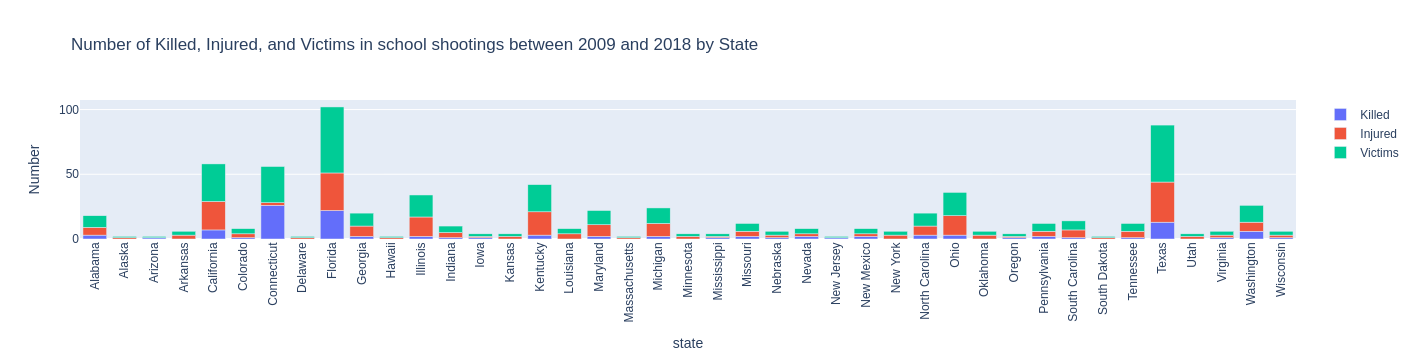

In [5]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

df = pd.read_csv('school_shootings.csv')
df_statepop = pd.read_csv('nst-est2019-alldata.csv')

df.columns = df.columns.str.strip()

# Remove unnecessary columns
columns_to_drop = ['LONCOD', 'LATCOD', 'CDCODE', 'year', 'school', 'city', 'address', 'urbanrural', 'race', 'date', 'type', 'NCESSCH', 'time']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Rename columns for better readability
df.rename(columns={'killed': 'Killed', 'injured': 'Injured', 'victims': 'Victims'}, inplace=True)

# Group by state and sum up the killed, injured, and victims
df_statewise = df.groupby('state')[['Killed', 'Injured', 'Victims']].sum().reset_index()

# Display the processed dataframe
df_statewise.head()

# Create the box plot for number of Killed, Injured, and Victims by State
fig = px.bar(df_statewise.melt(id_vars='state', value_vars=['Killed', 'Injured', 'Victims']),
             x='state', y='value', color='variable',
             labels={'variable': '', 'value': 'Number'},
             title='Number of Killed, Injured, and Victims in school shootings between 2009 and 2018 by State')

# Update layout for better visualization
fig.update_layout(xaxis_tickangle=-90)

fig.show()

*Figure 2: This chart represents the number of elementary, middle and high school students of 41 states between 2009 and 218, who have been witnesses of a school shooting. It visualizes the number of students that got killed, injured and victimized. There is missing data for the 9 remaining states.*

The chart shows the states Florida and Texas sticking out with the amount of killed, injured and victims. It is known that within these states, gun laws are quite permissive. Although states such as California and Connecticut are quite high, regardless of the strict laws, students are still vulnerable. According to the Stanford Institute for Economic Policy Research, students exposed to shootings are less likely to graduate high school, go to college, and graduate college, and they are less likely to be employed and have lower earnings in their mid-20’s. It also leads to a higher rate of antidepressant and an increase in absenteeism in the years following the gun violence.

The homicide rate in the USA is, thanks to the right to bear arms, a lot higher than similar countries with stricter gun laws, such as the Netherlands, Germany, France, and Spain. The visualization is a bar chart where the countries’ murder rate is visualized.

                    Country  Year     VALUE
0  United States of America  2019  3.151774
1                    Europe  2019  0.344465
2             North America  2019  1.285117
3  United States of America  2020  4.054271
4                    Europe  2020  0.275268
5             North America  2020  2.638050
6  United States of America  2021  5.528964
7                    Europe  2021  0.258776
8             North America  2021  3.661326


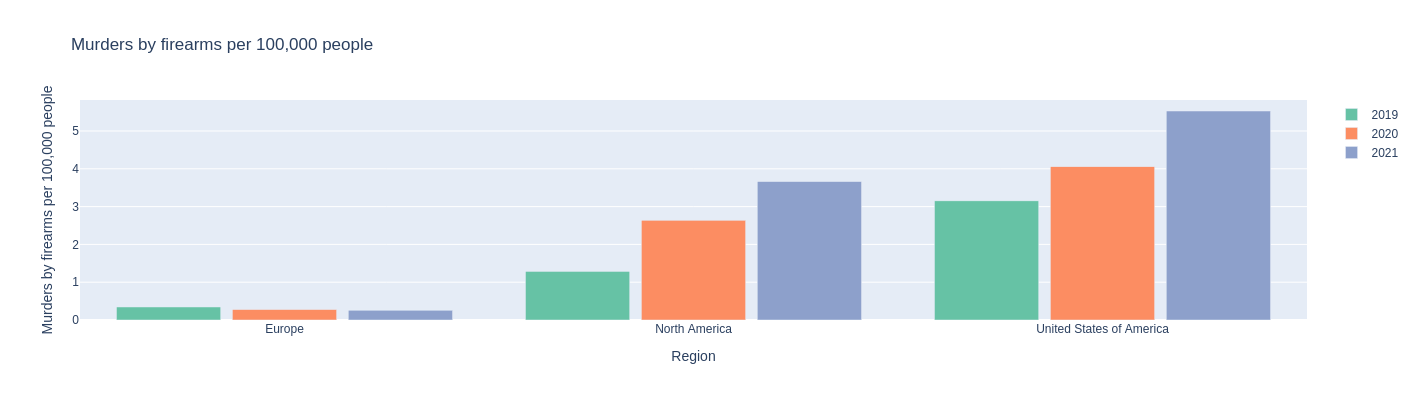

In [6]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode

df = pd.read_csv('Murder_rate_test.csv')

df = df.filter(['Country', 'Region', 'Subregion', 'Year','VALUE'])

europe_df = df[df['Region'] == 'Europe']

europe_2019 = europe_df[europe_df['Year'] == 2019]['VALUE'].mean()
europe_2020 = europe_df[europe_df['Year'] == 2020]['VALUE'].mean()
europe_2021 = europe_df[europe_df['Year'] == 2021]['VALUE'].mean()

north_america_df = df[df['Subregion'] == 'Northern America']

north_america_2019 = north_america_df[north_america_df['Year'] == 2019]['VALUE'].mean()
north_america_2020 = north_america_df[north_america_df['Year'] == 2020]['VALUE'].mean()
north_america_2021 = north_america_df[north_america_df['Year'] == 2021]['VALUE'].mean()



countries_to_keep = ["United States of America"]
df = df[df['Country'].isin(countries_to_keep)]

df = df.filter(['Country', 'Year', 'VALUE'])

d_europe = {'Country': ["Europe", "Europe", "Europe"], 'Year': [2019, 2020, 2021], 'VALUE': [europe_2019, europe_2020, europe_2021]}
d_north_america = {'Country': ["North America", "North America", "North America"], 'Year': [2019, 2020, 2021], 'VALUE': [north_america_2019, north_america_2020, north_america_2021]}

df_europe = pd.DataFrame(data=d_europe)
df_north_america = pd.DataFrame(data=d_north_america)

df = pd.concat([df, df_europe, df_north_america])
df = df.sort_values(by='Year', ascending=True)
df = df.reset_index(drop=True)

df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]
df_2021 = df[df['Year'] == 2021]

print(df)

# Create a figure
fig = go.Figure()
values = [df_2019['VALUE'], df_2020['VALUE'], df_2021['VALUE']]
titles = ['2019', '2020', '2021']
colors = ['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)']

for i in range(3):
    fig.add_trace(go.Bar(x=df['Country'],
                  y = values[i],
                  name=f"{titles[i]}",
                  marker_color=colors[i]))

fig.update_layout(
    title='Murders by firearms per 100,000 people',
    xaxis=dict(
        title='Region',
        type='category',
        categoryorder='category ascending'
    ),
    yaxis=dict(
        title='Murders by firearms per 100,000 people',
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    height=400
)

# Show the figure
fig.show()

*Figure 3: This bar graph compares the average murders by firearms per 100.000 people between Europe, North America and the United States in 3 years between 2019 and 2021.*

This graph shows that the United States has significantly more gun deaths on average when compared to the whole of North America and Europe. This further supports our argument that stricter gun laws should be implemented to lessen the deaths caused by gun violence. Europe had between 2019 and 2021 on average 15x less gun violence. This shows that gun usage and violence in America is extremely lethal and has a massive impact on the day to day lives of citizens compared to the whole of Europe.

## It's not as simple as taking away the guns

We are going to explore one argument against the notion that the right to bear arms is the main cause for gun related violence. We have made multiple visualizations to illustrate this point, and hope to explain that just taking the guns away without eradicating the root cause of all the gun violence is not gonna solve the problem. People will find things to substitute for the guns and the violence will continue. Those who are living paycheck to paycheck and are barely scraping by, are driven to crime and in turn, gun violence. Those who don't have stable employment and can't legally provide for themselves get into similar troubles.  

From the graphs we can see that in states with higher rates of poverty need to fight impoverishment and other socio-economic factors that might encourage a life of crime.

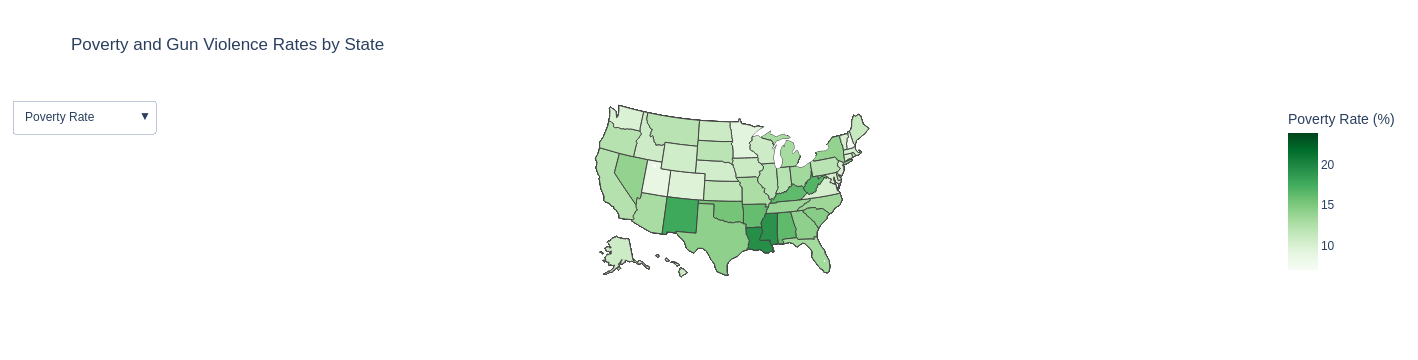

In [7]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load the datasets
df_poverty = pd.read_csv('poverty.csv')
df_guns = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df_statepop = pd.read_csv('nst-est2019-alldata.csv')

# Map state names to abbreviations
us_state_to_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

# Process poverty data
df_poverty['state_abbrev'] = df_poverty['Name'].map(us_state_to_abbrev)

# Process gun violence data
df_guns['date'] = pd.to_datetime(df_guns['date'])
df_guns_2018 = df_guns[df_guns['date'].dt.year == 2018]
df_guns_aggregated_2018 = df_guns_2018.groupby('state').agg({'n_killed': 'sum'}).reset_index()
df_guns_aggregated_2018['state_abbrev'] = df_guns_aggregated_2018['state'].map(us_state_to_abbrev)
df_guns_aggregated_2018 = df_guns_aggregated_2018.dropna(subset=['state_abbrev'])

state_code_to_abbrev = {
1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE',
11: 'DC', 12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN',
19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA',
26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV',
33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH',
40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN',
48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI',
56: 'WY', 72: 'PR'
}

df_statepop['state_abbrev'] = df_statepop['STATE'].map(state_code_to_abbrev)
df_merged = pd.merge(df_guns_aggregated_2018, df_statepop[['state_abbrev', 'POPESTIMATE2018']], on='state_abbrev', how='inner')
df_merged['gun_deaths_per_capita'] = df_merged['n_killed'] / df_merged['POPESTIMATE2018']

# Merge poverty and gun violence data
df_combined = df_poverty[['state_abbrev', 'Percent in Poverty']].merge(
df_merged[['state_abbrev', 'gun_deaths_per_capita']],
on='state_abbrev'
)

# Create the figure
fig = go.Figure()

# Add choropleth for Poverty
fig.add_trace(go.Choropleth(
locations=df_combined['state_abbrev'],
z=df_combined['Percent in Poverty'],
locationmode='USA-states',
colorscale='Greens',
colorbar_title="Poverty Rate (%)",
visible=True
))

# Add choropleth for Violence (initially hidden)
fig.add_trace(go.Choropleth(
locations=df_combined['state_abbrev'],
z=df_combined['gun_deaths_per_capita'],
locationmode='USA-states',
colorscale='Reds',
colorbar_title="Gun Deaths Per Capita",
visible=False
))

# Update layout to include dropdown menu
fig.update_layout(
title_text='Poverty and Gun Violence Rates by State',
geo=dict(
scope='usa',
projection=go.layout.geo.Projection(type='albers usa'),
),
updatemenus=[{
'buttons': [
{
'args': [{'visible': [True, False]}, {'title': 'Poverty Rate by State'}],
'label': 'Poverty Rate',
'method': 'update'
},
{
'args': [{'visible': [False, True]}, {'title': 'Gun Violence Rate by State'}],
'label': 'Gun Violence Rate',
'method': 'update'
}
],
'direction': 'down',
'showactive': True
}]
)

# Show the figure
fig.show()

*Figure 4 & figure 5: These choropleth maps show per state the poverty rate and the gun deaths per 100,00 people respectively, where a darker color corresponds to a higher amount. The average poverty rate  is 13.9% between 2011 and 2018. The average number of fatalities in these incidents is 0.25 while the average number of people injured is 0.49.*

These two choropleth maps show the correlation between poverty and gun violence per state. The first graph depicts the poverty rate among US states and the second graph shows the amount of gun violence victims per 100.000 residents. 
The link between poverty and gun violence is illustrated by the fact that states with higher amounts of poverty tend to have higher amounts of gun deaths. This supports the idea that the right to bear arms is not the root of the gun violence problem, but at most a catalyst to other socio-economic factors such as poverty.

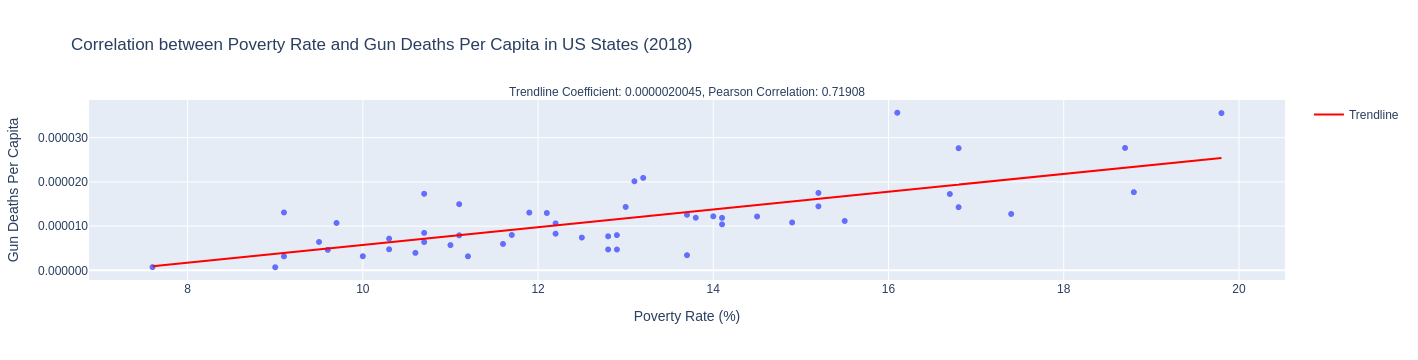

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import pearsonr

# Load the datasets
df_poverty = pd.read_csv('poverty.csv')
df_guns = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df_statepop = pd.read_csv('nst-est2019-alldata.csv')

# Filter the poverty dataset to include only 2018 data
df_poverty_2018 = df_poverty[df_poverty['Year'] == 2018].copy()

# Filter the gun violence dataset to include only 2018 data
df_guns['date'] = pd.to_datetime(df_guns['date'])
df_guns_2018 = df_guns[df_guns['date'].dt.year == 2018].copy()

# Rename 'Name' column in df_poverty to 'state' for merging
df_poverty_2018.rename(columns={'Name': 'state'}, inplace=True)

# Group by state and aggregate the gun violence data for 2018
df_guns_aggregated_2018 = df_guns_2018.groupby('state').agg({
    'n_killed': 'sum',
    'n_injured': 'sum'
}).reset_index()

# Merge the aggregated gun violence data with the poverty data for 2018
df_merged_2018 = pd.merge(df_poverty_2018, df_guns_aggregated_2018, on='state')

# Check and ensure state names match for the state population data
df_statepop['state'] = df_statepop['NAME']  # Assuming 'NAME' is the column with state names in df_statepop

# Merge with the state population data
df_merged_2018 = pd.merge(df_merged_2018, df_statepop[['state', 'POPESTIMATE2018']], on='state')

# Calculate gun deaths per capita using the 2018 population estimate
df_merged_2018['gun_deaths_per_capita'] = df_merged_2018['n_killed'] / df_merged_2018['POPESTIMATE2018']

# Calculate the Pearson correlation coefficient
pearson_corr, _ = pearsonr(df_merged_2018['Percent in Poverty'], df_merged_2018['gun_deaths_per_capita'])

# Perform linear regression using numpy
X = df_merged_2018['Percent in Poverty']
y = df_merged_2018['gun_deaths_per_capita']
slope, intercept = np.polyfit(X, y, 1)

# Create a scatter plot with a trend line using Plotly
fig = px.scatter(df_merged_2018,
                 x='Percent in Poverty',
                 y='gun_deaths_per_capita',
                 hover_data=['state'],
                 title='Correlation between Poverty Rate and Gun Deaths Per Capita in US States (2018)',
                 labels={
                     'Percent in Poverty': 'Poverty Rate (%)',
                     'gun_deaths_per_capita': 'Gun Deaths Per Capita'
                 })

# Add the trend line manually
fig.add_trace(go.Scatter(
    x=df_merged_2018['Percent in Poverty'],
    y=intercept + slope * df_merged_2018['Percent in Poverty'],
    mode='lines',
    name='Trendline',
    line=dict(color='red')
))

# Update layout to display coefficient
fig.update_layout(
    annotations=[
        dict(
            x=0.5,
            y=1.1,
            xref='paper',
            yref='paper',
            text=f'Trendline Coefficient: {slope:.10f}, Pearson Correlation: {pearson_corr:.5f}',
            showarrow=False,
            font=dict(size=12)
        )
    ],
    yaxis_tickformat='.6f',  # Ensure ticks on y-axis are formatted to 6 decimal places
    yaxis_title='Gun Deaths Per Capita',  # Explicitly set the y-axis title
    xaxis_title='Poverty Rate (%)'  # Explicitly set the x-axis title
)

# Show the plot
fig.show()

*Figure 6: This scatter plot has the poverty rate as its x-value and the gun deaths per capita as its y-value, each dot represents a state and the trend line displays the correlation between the two variables. The mean of the “Total Unemployment in State/Area“ is 170k and the standard deviation is 215k.*

This scatter plot also shows the correlation between poverty rate and gun deaths per state, where the trend line clearly implies a positive correlation between these two variables, where a higher rate of poverty generally correlates to a higher amount of gun deaths per capita. The coefficient of the graph is 0.0000020045 and the Pearson correlation is 0.71908 which tells us that between these datasets there is a significant correlation between the data in the two sets.

Pearson Correlation Coefficient: 0.58


/tmp/ipykernel_19684/3118721721.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



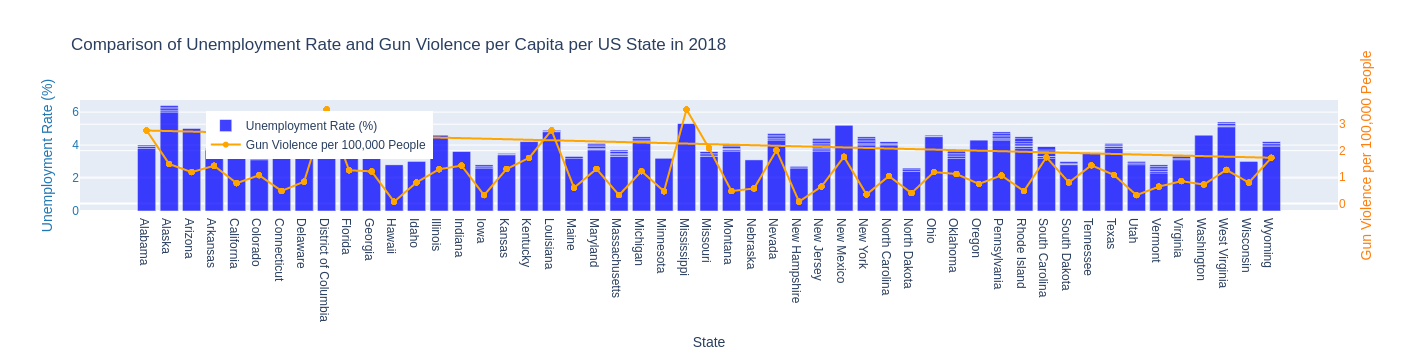

In [11]:
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import pearsonr

# Load the datasets
df_guns = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df_unemployment = pd.read_csv('Unemployment in America Per US State.csv')
df_statepop = pd.read_csv('nst-est2019-alldata.csv')

# Convert date column to datetime
df_guns['date'] = pd.to_datetime(df_guns['date'])

# Filter data for 2018
df_guns_2018 = df_guns[df_guns['date'].dt.year == 2018]

# Aggregate gun violence data by state
df_guns_agg = df_guns_2018.groupby('state')['n_killed'].sum().reset_index()

# Filter unemployment data for 2018
df_unemployment_2018 = df_unemployment[df_unemployment['Year'] == 2018]

# Select relevant columns from population dataset
df_statepop_2018 = df_statepop[['STATE', 'POPESTIMATE2018']]

# Replace state codes with state names in the population dataset
state_codes = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 9: 'Connecticut',
    10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho',
    17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine',
    24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri',
    30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico',
    36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon',
    42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee',
    48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington', 54: 'West Virginia',
    55: 'Wisconsin', 56: 'Wyoming'
}
df_statepop_2018['state'] = df_statepop_2018['STATE'].map(state_codes)

# Merge the datasets on the state
df_merged = pd.merge(df_unemployment_2018, df_guns_agg, left_on='State/Area', right_on='state')
df_merged = pd.merge(df_merged, df_statepop_2018[['state', 'POPESTIMATE2018']], on='state')

# Calculate gun violence per capita
df_merged['n_killed_per_capita'] = df_merged['n_killed'] / df_merged['POPESTIMATE2018'] * 100000  # per 100,000 people

# Calculate Pearson correlation
pearson_corr, _ = pearsonr(df_merged['Percent (%) of Labor Force Unemployed in State/Area'], df_merged['n_killed_per_capita'])
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")

# Create Dual Axis plot
fig = go.Figure()

# Add unemployment data to the plot
fig.add_trace(
    go.Bar(x=df_merged['State/Area'], y=df_merged['Percent (%) of Labor Force Unemployed in State/Area'], name='Unemployment Rate (%)', yaxis='y1', marker_color='blue', opacity=0.75)
)

# Add gun violence per capita data to the plot
fig.add_trace(
    go.Scatter(x=df_merged['State/Area'], y=df_merged['n_killed_per_capita'], name='Gun Violence per 100,000 People', yaxis='y2', mode='lines+markers', marker=dict(color='orange'))
)

# Create axis objects
fig.update_layout(
    title='Comparison of Unemployment Rate and Gun Violence per Capita per US State in 2018',
    xaxis=dict(title='State'),
    yaxis=dict(title='Unemployment Rate (%)', titlefont=dict(color='#1f77b4'), tickfont=dict(color='#1f77b4')),
    yaxis2=dict(title='Gun Violence per 100,000 People', titlefont=dict(color='#ff7f0e'), tickfont=dict(color='#ff7f0e'), overlaying='y', side='right'),
    legend=dict(x=0.1, y=0.9),
    barmode='overlay'
)

fig.show()


*Figure 7: Here we have combined a bar graph with a graph chart, the x-axis showing the states and the y-axis showing both the unemployment rate for the bar graph and the gun violence per 100,000 people for the line graph.*

This graph illustrates the relation between the unemployment rate per state, displayed as a bar graph, on the one hand and the amount of gun violence per 100.000 people, displayed as a line graph, on the other hand. When comparing the two values, one can clearly see a correlation. This correlation cements our arguments that it's not merely the right to own and carry guns, but socio-economic factors like unemployment can drive people to commit gun violence. The Pearson correlation between these two graphs is 0.58, which is quite high and insinuates a strong correlation between the two datasets used in this graph.